In [ ]:
#参考https://www.cnblogs.com/sui776265233/p/11146969.html

## 爬虫完整代码

In [1]:
import requests
import math
import time
import pandas as pd


def get_json(url, num):
    """
    从指定的url中通过requests请求携带请求头和请求体获取网页中的信息,
    :return:
    """
    url1 = 'https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%B8%88?labelWords=&fromSearch=true&suginput='
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.75 Safari/537.36',
        'Host': 'www.lagou.com',
        'Referer': 'https://www.lagou.com/jobs/list_%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E5%B8%88?labelWords=&fromSearch=true&suginput=',
                
        'X-Anit-Forge-Code': '0',
        'X-Anit-Forge-Token': 'None',
        'X-Requested-With': 'XMLHttpRequest'
    }
    data = {
        'first': 'true',
        'pn': num,
        'kd': '数据分析师'}
    s = requests.Session()
    print('建立session：', s, '\n\n')
    s.get(url=url1, headers=headers, timeout=3)
    cookie = s.cookies
    print('获取cookie：', cookie, '\n\n')
    res = requests.post(url, headers=headers, data=data, cookies=cookie, timeout=3)
    res.raise_for_status()
    res.encoding = 'utf-8'
    page_data = res.json()
    print('请求响应结果：', page_data, '\n\n')
    return page_data


def get_page_num(count):
    """
    计算要抓取的页数，通过在拉勾网输入关键字信息，可以发现最多显示30页信息,每页最多显示15个职位信息
    :return:
    """
    page_num = math.ceil(count / 15)
    if page_num > 30:
        return 30
    else:
        return page_num


def get_page_info(jobs_list):
    """
    获取职位
    :param jobs_list:
    :return:
    """
    page_info_list = []
    for i in jobs_list:  # 循环每一页所有职位信息
        job_info = []
        job_info.append(i['companyFullName'])
        job_info.append(i['companyShortName'])
        job_info.append(i['companySize'])
        job_info.append(i['financeStage'])
        job_info.append(i['district'])
        job_info.append(i['positionName'])
        job_info.append(i['workYear'])
        job_info.append(i['education'])
        job_info.append(i['salary'])
        job_info.append(i['positionAdvantage'])
        job_info.append(i['industryField'])
        job_info.append(i['firstType'])
        job_info.append(i['companyLabelList'])
        job_info.append(i['secondType'])
        job_info.append(i['city'])
        page_info_list.append(job_info)
    return page_info_list

def main():
    url = ' https://www.lagou.com/jobs/positionAjax.json?needAddtionalResult=false'
    first_page = get_json(url, 1)
    total_page_count = first_page['content']['positionResult']['totalCount']
    num = get_page_num(total_page_count)
    total_info = []
    time.sleep(10)
    print("数据分析相关职位总数:{},总页数为:{}".format(total_page_count, num))
    for num in range(1, num + 1):
        # 获取每一页的职位相关的信息
        page_data = get_json(url, num)  # 获取响应json
        jobs_list = page_data['content']['positionResult']['result']  # 获取每页的所有数据分析相关的职位信息
        page_info = get_page_info(jobs_list)
        print("每一页数据分析相关的职位信息:%s" % page_info, '\n\n')
        total_info += page_info
        print('已经爬取到第{}页，职位总数为{}'.format(num, len(total_info)))
        time.sleep(5)
        # 将总数据转化为data frame再输出,然后在写入到csv各式的文件中
        df = pd.DataFrame(data=total_info,
                          columns=['公司全名', '公司简称', '公司规模', '融资阶段', '区域', '职位名称', '工作经验', '学历要求', '薪资', '职位福利', '经营范围',
                                   '职位类型', '公司福利', '第二职位类型', '城市'])
        df.to_csv('数据分析.csv', index=False)
        print('数据分析师相关职位信息已保存')


if __name__ == '__main__':
    main()

建立session： <requests.sessions.Session object at 0x0000026C625E65F8> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2818412590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153548-4a1dc27e-1401-4cab-aa7a-3f78b02ce7e2 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAABEEAAJAE441E71B9C1E6FC9BB38476B6691E785 for www.lagou.com/>, <Cookie SEARCH_ID=43912548b26a4d0e9a90e8fe1a7cbc1f for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '488654f9570e4603bc9b5ebede4bed3b', 'hrInfoMap': {'5984122': {'userId': 3609217, 'portrait': 'i/image2/M01/CD/B1/CgoB5lw4CHiAPBbCAADPrl55EiU870.jpg', 'realName': '陈女士', 'positionName': '人力资源专员', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5576119': {'userId': 3032901, 'portrait': 'i/image2/M01/C0/44/CgoB5lwt2OWAag5zAAAc3PwJHi0638.png', 'realName': '拼多多', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6372

数据分析相关职位总数:1226,总页数为:30
建立session： <requests.sessions.Session object at 0x0000026C64F99128> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2819512590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153559-c9c035a9-e256-49b8-958a-8f9dcfc452c8 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAABEEAAJAF0BA09690A49E0665D9C6AA066274DEB for www.lagou.com/>, <Cookie SEARCH_ID=a8c02714e1fd4471a0c94779bf09f111 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '52a3f2f4f3fc48c9804971be0b553653', 'hrInfoMap': {'5984122': {'userId': 3609217, 'portrait': 'i/image2/M01/CD/B1/CgoB5lw4CHiAPBbCAADPrl55EiU870.jpg', 'realName': '陈女士', 'positionName': '人力资源专员', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5576119': {'userId': 3032901, 'portrait': 'i/image2/M01/C0/44/CgoB5lwt2OWAag5zAAAc3PwJHi0638.png', 'realName': '拼多多', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1',

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64ADF710> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2816612590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153606-a81120d0-44f6-4f90-8529-376737ab1a19 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAGFABEFBB7F3126772C9AFD686004D9F370DCE5 for www.lagou.com/>, <Cookie SEARCH_ID=e40139e265c84f288347a100c1dac324 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '44a45623eac94f74b94fedc0b440767a', 'hrInfoMap': {'6480867': {'userId': 2813400, 'portrait': 'i/image2/M01/05/44/CgotOVyUUo-AcBeHAABdXSJnDug571.png', 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6487269': {'userId': 10223682, 'portrait': 'i/image2/M01/36/AF/CgotOVzky6yAUZKDAAAu5MZCIO8004.jpg', 'realName': '高灯科技HR', 'positionName': '高灯科技HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'ca

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64240908> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2811712590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153611-a716211a-c2b3-4a20-9db6-abbb2c1dad97 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAIAACBID7AC9DD603DCF24D1D7305A7FC9E5931 for www.lagou.com/>, <Cookie SEARCH_ID=4d7b5ec8c2174866a620010897845b64 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '4dbd582cb01746988a2185371f62902e', 'hrInfoMap': {'6485766': {'userId': 8181825, 'portrait': 'i/image2/M01/83/2A/CgoB5l1t2J2AfhLwAAY-X39g8XY585.jpg', 'realName': '李晶晶', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6201593': {'userId': 1313819, 'portrait': 'i/image2/M01/83/45/CgoB5l1t7BWAVGccAAD3vjAVsEQ503.jpg', 'realName': 'Clear', 'positionName': '部门总经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'ca

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C63F88898> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2817712590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153617-e0af8b9f-b4e8-4247-bea2-62e247c35f06 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAIAACBIEEAC236313A0E6D942B1920D4AF15B4C for www.lagou.com/>, <Cookie SEARCH_ID=3fc74d53fffc43aeaaa2385ac8591c7e for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'd2ea27d00c744504b9e02982e8907062', 'hrInfoMap': {'6480259': {'userId': 15331114, 'portrait': 'i/image2/M01/0E/AC/CgotOVyhgc-AFnq_AACAHyZqbrs619.png', 'realName': '张海洋', 'positionName': '决策科学总监', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6481537': {'userId': 15162572, 'portrait': 'i/image2/M01/0E/8C/CgoB5lyhgdiAN-4AAACeGEp-ay0931.png', 'realName': '李想', 'positionName': '人事助理 、招聘专员、', 'phone': None, 'receiveEmail': None, 'userLevel': 'G

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64FA5A90> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2813812590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153623-4b2fd6d0-2a4b-48de-a9da-55bca7b47cf9 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '33b53b094c0942c6bf91cc3dfac94a7e', 'hrInfoMap': {'6339872': {'userId': 1313819, 'portrait': 'i/image2/M01/83/45/CgoB5l1t7BWAVGccAAD3vjAVsEQ503.jpg', 'realName': 'Clear', 'positionName': '部门总经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6484678': {'userId': 14457589, 'portrait': 'i/image2/M01/64/B0/CgoB5l0xFKGAFl4_AABq7l7a11A688.png', 'realName': '美的金融', 'positionName': '人力资源主任', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6489158': {'userId': 4327102, 'portrait': 'i/image2/M01/0F/DC/CgotOVyiwe6AY4tGAAEwLwPzlfA323.jpg', 'realName': '哈', 'positionName': 'HR', 'p

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C625E65F8> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2818812590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153628-1b4282b9-6c68-4a25-9b31-cf10106b1dba for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '4246153744b04c43aa6d7bed71d91d70', 'hrInfoMap': {'5883451': {'userId': 11119819, 'portrait': 'i/image2/M01/7C/2B/CgotOV1eqhyAN25OAAHCBeX5ihc96.jpeg', 'realName': 'Jessie', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6264701': {'userId': 10339671, 'portrait': 'i/image3/M00/40/47/Cgq2xlqzGy6AQSyaAABtFaGIUrc895.jpg', 'realName': '杨琳', 'positionName': '招聘主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6214812': {'userId': 8658127, 'portrait': 'i/image/M00/5D/63/CgpEMlmK2oOAPW4RAAAYRM_zW64061.jpg', 'realName': '招聘小秘', 'positionName': '首席招聘官', 'p

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64F25FD0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2814912590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153634-412c2041-9a29-4f19-9abb-79f1d01732c4 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'e3c753d5e44a4b1fa7e6234900e15d45', 'hrInfoMap': {'6402051': {'userId': 5131446, 'portrait': 'i/image2/M01/B4/6D/CgoB5lwHTIqARfOXAAAhnvwK0H0706.jpg', 'realName': '刘吕麟', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6147483': {'userId': 1787522, 'portrait': 'i/image2/M01/25/1C/CgoB5lzFWm6ADgjVAADr8Frqxpw787.jpg', 'realName': 'HR', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5456635': {'userId': 9267261, 'portrait': 'i/image2/M01/BD/A9/CgoB5lwjSpSAd23RAAAICBoUWYA516.jpg', 'realName': '梨落', 'positionName': 'HRBP', 'phone': No

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64D35D68> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2819912590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153639-e52027df-a480-4787-bc3a-eeec199c2d31 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '72ef833ac8204e8285ff71c9b7f6389f', 'hrInfoMap': {'6475554': {'userId': 11480061, 'portrait': 'i/image2/M01/81/7A/CgotOVt_2YyAQYQDAAAvC4GeS7I043.png', 'realName': 'hr', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5158062': {'userId': 11716447, 'portrait': 'i/image2/M01/90/78/CgotOVujBteAT06lAAKpINxucro462.png', 'realName': '周峰', 'positionName': 'Director', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6440871': {'userId': 8058795, 'portrait': 'i/image2/M01/0E/AC/CgotOVyhgdWACcZgAABtgMsGk64396.png', 'realName': '樊燕', 'positionName': 'HR', 'phone':

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C65033438> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2814022590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153644-903b436b-dab0-4543-b63d-a2fa47836759 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'dd4889f03c9646708b6c44be4e5bbf2f', 'hrInfoMap': {'6427811': {'userId': 11137527, 'portrait': 'i/image2/M01/49/5D/CgotOV0G84mAEcVzAABmVRXshsM037.png', 'realName': '姜燕', 'positionName': '招聘主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '4644866': {'userId': 4372370, 'portrait': 'i/image2/M01/D7/B2/CgotOVxhMDaAXPvzAABM-hS-V1c075.png', 'realName': '加静静', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5040265': {'userId': 1532225, 'portrait': 'i/image2/M01/FC/F6/CgotOVyLAGqAChXcAABko4BOQKM414.jpg', 'realName': '对庄招聘HR', 'positionName': '市场负责人', '

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64FD8A20> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2810122590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153650-978aeb77-aefb-40a5-948d-720d083e465b for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAFCAAEG1C7A7A0C58753D3BD393C09F447449FF for www.lagou.com/>, <Cookie SEARCH_ID=3d637424417040b38844cd78f8549106 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '5a8daaafe21f4b99b555d1282ca3fc2e', 'hrInfoMap': {'5864828': {'userId': 1367489, 'portrait': None, 'realName': 'sheng.xiyang', 'positionName': None, 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5736785': {'userId': 687874, 'portrait': None, 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '4379947': {'userId': 1787522, 'portrait': 'i/image2/M01/25/1C/CgoB5lzFWm6ADgjVAADr8Frq

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64F25EF0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2816122590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153656-f6478754-80c1-4e62-8d3c-3895693aa615 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAGFABEF620393D1D369BF53733BD9DAD84BA70E for www.lagou.com/>, <Cookie SEARCH_ID=33e421dfeee8491faf60b80cadebf6f0 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'b9777d7cf9cd43419468206b34083713', 'hrInfoMap': {'6475554': {'userId': 11480061, 'portrait': 'i/image2/M01/81/7A/CgotOVt_2YyAQYQDAAAvC4GeS7I043.png', 'realName': 'hr', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '4391587': {'userId': 5814504, 'portrait': 'i/image3/M00/49/35/Cgq2xlrO8ciANNwkAABVPJyAR50092.png', 'realName': '嘀嗒出行', 'positionName': '招聘经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk'

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64EFE1D0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2813222590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153703-e67353a7-724d-44ee-ac13-722617a37358 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAGGABCB968DF036BFF91710C7BC7943001CE713 for www.lagou.com/>, <Cookie SEARCH_ID=0dd4cd6ca4e145818797b36521a3611b for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'c2ae7f74d63a472a8e5383d1a2f8bbe1', 'hrInfoMap': {'6366432': {'userId': 1676595, 'portrait': None, 'realName': '欢聚时代HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6271450': {'userId': 14774746, 'portrait': 'i/image2/M01/72/36/CgoB5l1K62OAWamOAAI9eIXs-SI640.png', 'realName': '陈晓茹', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6093209': {'userId': 11235008, 'portra

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64FB3160> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2818222590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153708-f7ce538a-425e-4b78-b4c1-377cf6671940 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAFCAAEGE86CB8DA73A6117180243C44B93AB19E for www.lagou.com/>, <Cookie SEARCH_ID=b27288681bcf4e4fb4a5164d232ed5e7 for www.lagou.com/>]> 




请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '28c4ea350bc14bc69049d52a72466f8a', 'hrInfoMap': {'6021272': {'userId': 176107, 'portrait': None, 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '4041848': {'userId': 8244707, 'portrait': 'i/image3/M00/04/1D/Cgq2xlpdyTaAGp1TAAAdLQoB6LA003.png', 'realName': '柏视HR', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6054714': {'userId': 4022869, 'portrait': 'i/image2/M01/0F/0D/CgoB5lyhyheAfWM8AADNVl58_Ds125.png', 'realName': '赖宇飞', 'positionName': '招聘主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6246678': {'userId': 9252395, 'portrait': 'i/image2/M00/2E/22/CgoB5lozQLqAYy9lAAAE22sFomI79.jpeg', 'realName': '杨艳迪', 'positionName': '人事', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6459539': {'userId': 11313921, 'portrait': 'i/image2/M01/1E/01/CgotOV

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C65049A58> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2814322590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153714-530e6a28-1b8e-4a42-a842-5616ac039329 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAADEAAFIE1BAECB308B433DDCB5A70D1ECB6AF93 for www.lagou.com/>, <Cookie SEARCH_ID=d1bb78693c454682938de89e54777594 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '61233e419a584b27b2073794a4f80305', 'hrInfoMap': {'6469059': {'userId': 10668520, 'portrait': 'i/image2/M01/0E/AC/CgotOVyhgc2AU_p3AABtO4vAHkg858.png', 'realName': '江先生', 'positionName': '招聘经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6344772': {'userId': 23078, 'portrait': 'i/image/M00/96/58/CgqKkVicM3GAMNXyAAAhOZurC9c155.jpg', 'realName': '马国瑞', 'positionName': '招聘主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C63F88898> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2819322590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153719-9c97c282-246b-4b12-8ca5-414b75926f00 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'c7dc0e1e96eb4f5d8e19d4038ca5fd3c', 'hrInfoMap': {'5941625': {'userId': 785890, 'portrait': 'i/image2/M01/4D/B9/CgoB5l0MdgSAdR_6AAAjzzIZ-Mc746.png', 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6436225': {'userId': 681369, 'portrait': 'i/image2/M01/E9/F3/CgotOVx3R_6ASSO_AADQYxc3cyc422.png', 'realName': '一手hr/富米科技', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6251576': {'userId': 617968, 'portrait': 'i/image2/M01/C0/21/CgotOVwtf2qAElnRAAAesI4gbrE963.png', 'realName': '蓝叔', 'positionName': 'HR', 'phone': N

每一页数据分析相关的职位信息:[['深圳前海联动云汽车租赁有限公司', '前海联动云', '2000人以上', '不需要融资', '龙华新区', '数据分析师', '5-10年', '大专', '13k-18k', '年底双薪，业务发展迅速，晋升空间大。', '消费生活', '产品|需求|项目类', ['O2O', '带薪年假', '交通补助', '午餐补助'], '数据分析', '深圳'], ['广州银行股份有限公司信用卡中心', '广州银行信用卡中心', '2000人以上', '不需要融资', '天河区', '数据分析师', '1-3年', '本科', '10k-15k', '平台建设，业务扩张迅速，消费金融行业增涨', '金融', '产品|需求|项目类', ['带薪年假', '午餐补助', '发展平台', '金融'], '数据分析', '广州'], ['广州市梦享网络技术有限公司', '梦享网络', '50-150人', 'B轮', '朝阳区', '数据分析师', '3-5年', '本科', '13k-25k', '绩效奖金；股票期权；扁平管理；周末双休', '移动互联网,广告营销', '产品|需求|项目类', ['双休', '五险一金', '节日礼物', '股票期权'], '数据分析', '北京'], ['上海跃橙文化传播有限公司', '独立日', '50-150人', 'B轮', '杨浦区', '数据分析师', '不限', '本科', '15k-25k', '团队氛围好 交通便利 地铁附近', '移动互联网', '产品|需求|项目类', ['绩效奖金', '午餐补助', '美女多', '弹性工作'], '数据分析', '上海'], ['珠海随变科技有限公司', '必要商城', '150-500人', '不需要融资', '朝阳区', '数据分析师', '3-5年', '本科', '15k-25k', '首家C2M', '电商', '产品|需求|项目类', ['商业医疗保险', '带薪年假', '扁平管理', '下午茶'], '数据分析', '北京'], ['上海初生网络科技有限公司', 'Rela热拉-多元女性社区', '50-150人', 'B轮', '虹口区', '数据分析师', '1-3年', '本科', '15k-18k', '期权激励,奖金丰厚,团

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64240908> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2810522590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153730-8da811de-7d36-451e-a41d-6ba753e6d4b5 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '9f5fd99438204fc7961b9fd81dbbe29c', 'hrInfoMap': {'6099865': {'userId': 4982115, 'portrait': 'i/image2/M01/35/16/CgoB5lzin5KAFjs3AACeGEp-ay0590.png', 'realName': '海澜', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5559632': {'userId': 11796966, 'portrait': 'i/image2/M01/B7/A3/CgotOVwQctyAOlqkAAA4MDgVi1k822.png', 'realName': 'Ivy', 'positionName': '人力资源主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6338535': {'userId': 6175189, 'portrait': None, 'realName': 'hr', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'ca

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64EFE1D0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2816522590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153736-b9afe961-2d64-48c0-bdcb-abe81831f38b for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'd74ccb90a28c4cdc89c0830e95ad8bd5', 'hrInfoMap': {'5120398': {'userId': 10671002, 'portrait': 'i/image2/M01/96/14/CgotOV2cYbSAPbiLAACeGEp-ay0368.png', 'realName': '冯女士', 'positionName': '字节跳动HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5880792': {'userId': 248743, 'portrait': 'i/image/M00/20/FD/CgpFT1kVJTWAQ5QbAACeCc8Xiu4372.png', 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5899704': {'userId': 414154, 'portrait': None, 'realName': 'hr', 'positionName': '招聘经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'can

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64FB30F0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2811622590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153741-d19c3f21-3b77-4d11-8434-517564d8de93 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'b7c78f88012a47cdaa85ab63b869e5a0', 'hrInfoMap': {'4957675': {'userId': 4868538, 'portrait': 'i/image3/M00/30/5E/CgpOIFqh4Z6AJ5hbAAENhqTglSo152.jpg', 'realName': '梁梁', 'positionName': '人力资源主管', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5119182': {'userId': 11486665, 'portrait': 'i/image2/M01/7C/40/CgoB5ltzvdqARJ9BAAA8IfY_Dt480.jpeg', 'realName': '魏颖', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6316064': {'userId': 14216505, 'portrait': 'i/image2/M01/0E/AC/CgotOVyhgdWACcZgAABtgMsGk64396.png', 'realName': '何微', 'positionName': '招聘专员', 'pho

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64FD8A20> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2816622590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153746-707f6eff-2c99-4d96-88f1-6a5628293bfc for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '9e3b7631813b4ba78d8a70585e73cb66', 'hrInfoMap': {'6287132': {'userId': 13348134, 'portrait': 'i/image2/M01/2A/EE/CgotOVzSfsiAHbZLAACeGEp-ay0961.png', 'realName': 'Lynn', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6427495': {'userId': 2813400, 'portrait': 'i/image2/M01/05/44/CgotOVyUUo-AcBeHAABdXSJnDug571.png', 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6278970': {'userId': 13706016, 'portrait': 'i/image2/M01/3E/22/CgotOVzxACuAGy7fAABq7l7a11A255.png', 'realName': '罗小姐', 'positionName': '招聘经理', 'phone'

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64240908> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2812722590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153752-ac36549a-3fb8-470a-b68c-70e3af60710a for .lagou.com/>, <Cookie JSESSIONID=ABAAABAABEEAAJA972B179AF0F7A583628781CC6D923FA7 for www.lagou.com/>, <Cookie SEARCH_ID=9d8fb8f0ce22445dbcf80e5d64c5a073 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '2a69b126e70f463395742fb40773c3e3', 'hrInfoMap': {'6349826': {'userId': 169945, 'portrait': 'i/image2/M01/03/F5/CgotOVyS-zeAVaSwAABb2JdEYEA015.png', 'realName': 'Judy', 'positionName': '高级人力资源经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6405763': {'userId': 681369, 'portrait': 'i/image2/M01/E9/F3/CgotOVx3R_6ASSO_AADQYxc3cyc422.png', 'realName': '一手hr/富米科技', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1',

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C625E6748> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2818722590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153758-58d55b68-bbff-4b66-92d4-b4789c6ab838 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAFCAAEG53A8F5EC8876716DA9F968FDC43A1D34 for www.lagou.com/>, <Cookie SEARCH_ID=895dfd301fd743cbbaeb7804fa9c1b18 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '01a182836b15461c8eee9a1a654ade41', 'hrInfoMap': {'5681878': {'userId': 5321992, 'portrait': 'i/image2/M01/EA/04/CgotOVx3T9CAT_9vAAFB6edz76E544.png', 'realName': '胡迪迪', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6264637': {'userId': 7243591, 'portrait': 'i/image/M00/3D/60/CgpEMllMwq2AEE-CAAAZAKz9HQY321.jpg', 'realName': 'hr', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': T

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64EFE1D0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2813822590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153803-5e62ea43-720d-4e50-8f60-1959b8388801 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAAGFABEF35B1BE5FC438C01D96CFB43366F1A470 for www.lagou.com/>, <Cookie SEARCH_ID=017c491844704d918d19673f17708cac for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '4a667ff2e23b4908a42c1ca4e6e35262', 'hrInfoMap': {'6153247': {'userId': 8751641, 'portrait': None, 'realName': 'zhaojing.919', 'positionName': '', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6470602': {'userId': 8787597, 'portrait': 'i/image2/M01/22/7C/CgoB5lzAHQGAMBpBAAAqXBFl0YI675.png', 'realName': '苏女士', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6473385': {'userId': 8576929, 'po

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C646FCD30> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2819822590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153809-e1108ae7-483d-416c-aef8-927247777015 for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAADEAAFIFB9C478846B6DE212DFC60E9B84B6BEA for www.lagou.com/>, <Cookie SEARCH_ID=303b672abbd3446d8817b0f9b2decca1 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '34e32e3daf134d89aaf9ee4124479421', 'hrInfoMap': {'6314723': {'userId': 1401752, 'portrait': 'i/image/M00/92/F2/CgpEMlsHeRGAMZBbAAJgGtlbe-Q081.jpg', 'realName': '斗鱼直播', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6460871': {'userId': 9924250, 'portrait': 'i/image2/M01/97/0A/CgotOVu8eeyAXuqqAACxymMIGaI659.jpg', 'realName': '宿文龙', 'positionName': '招聘', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk':

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64D35D68> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2815922590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153815-3a7aa3d8-343f-4e56-bc22-d405e2c19cec for .lagou.com/>, <Cookie JSESSIONID=ABAAABAAADEAAFI68205F25DFE91E17BB6B0C7B9E8F5574 for www.lagou.com/>, <Cookie SEARCH_ID=e6b819c561164efbac831223eadc3337 for www.lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'b849464b9e63457094eb4656eaa5e3f3', 'hrInfoMap': {'5688086': {'userId': 4923853, 'portrait': 'i/image2/M01/F9/36/CgotOVyHZEmAfy2TAAABrexw3gM133.png', 'realName': '童童', 'positionName': '招聘 HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6349251': {'userId': 631701, 'portrait': 'i/image2/M01/73/0F/CgotOVterMGAGdtyAAOZsjkw2Cg686.png', 'realName': '51信用卡HR', 'positionName': '技术 金融 产品 职能', 'phone': None, 'receiveEmail': None, 'userLevel': 'G

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C650A8A90> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2810032590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153820-ba695268-41a5-4b5e-93ca-09ff0897b412 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'd96d776612274e089ef6defa63b2f079', 'hrInfoMap': {'6477127': {'userId': 11224879, 'portrait': 'i/image2/M01/18/05/CgoB5lyvAAyAdOYrAAAvpRKYRkU819.jpg', 'realName': '史艳', 'positionName': '招聘 HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5132779': {'userId': 8755848, 'portrait': 'i/image2/M01/8D/64/CgotOVubNx-ABctBAAAwM6oTRHs188.png', 'realName': 'HR', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5976446': {'userId': 9301239, 'portrait': 'i/image2/M01/3C/49/CgoB5lzuTaSAS6O6AAAvx69xirM975.jpg', 'realName': '朱珊珊', 'positionName': 'HR BP', 'phone

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C6508DBA8> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2815032590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153825-c3452df1-ce29-49f9-9ef4-bf010944b21a for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'bf273482d1bb4d14b9354f3373be24da', 'hrInfoMap': {'6366881': {'userId': 1729309, 'portrait': 'i/image2/M01/1C/A8/CgotOVy2kpKAWGtfAABK-k--caU350.png', 'realName': '张先生', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '4737871': {'userId': 6952672, 'portrait': 'i/image2/M01/8C/86/CgotOVuZpGGAacRCAADtrxj3-zE516.jpg', 'realName': '陈思睿', 'positionName': '招聘经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6230648': {'userId': 11289206, 'portrait': 'i/image2/M01/65/E0/CgoB5l00MX6Ae0G-AAArwE2pLXg768.png', 'realName': '周璇', 'positionName': '招聘主管', 'phon

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64F25F60> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2811132590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153831-3af0f6c7-4724-406e-89bf-73c9e7a88bba for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '5372dc3974c34608936cb40d18454a9f', 'hrInfoMap': {'5134571': {'userId': 8518960, 'portrait': 'i/image2/M01/85/14/CgotOVuJAlKAMKD3AABRocPHeJw343.jpg', 'realName': '郭德龙', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6052347': {'userId': 6302995, 'portrait': 'i/image2/M01/F0/B2/CgotOVx-M1WAUsdaAAA9gydUJNU285.jpg', 'realName': 'Joy.liu', 'positionName': '招聘经理', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '3058921': {'userId': 757541, 'portrait': 'i/image2/M01/E9/EC/CgotOVx3Q-2AeswdAAHITbrf82g052.png', 'realName': '网营科技', 'positionName': 'HR', 'ph

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64F54E48> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2817132590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153837-d38a5386-f359-4aed-b54e-2f9fb751d983 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': '74d512637cd14b549c252b30f3e8edb5', 'hrInfoMap': {'5713491': {'userId': 8049739, 'portrait': None, 'realName': '久谦技术', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5120105': {'userId': 5029153, 'portrait': None, 'realName': 'EmmaWu', 'positionName': 'HRBP', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5341243': {'userId': 1308500, 'portrait': 'i/image3/M00/4E/1E/Cgq2xlrqrYCAF2t5AACkbyUB5qc387.png', 'realName': 'HR', 'positionName': 'SHRM', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '5992022': {'userId': 8052678, '

数据分析师相关职位信息已保存
建立session： <requests.sessions.Session object at 0x0000026C64DDA7F0> 


获取cookie： <RequestsCookieJar[<Cookie X_HTTP_TOKEN=42daf4b72327b2812232590751bf5e71415983ed09 for .lagou.com/>, <Cookie user_trace_token=20191013153842-8b606287-4095-42ed-b42f-c62df0abb799 for .lagou.com/>]> 


请求响应结果： {'success': True, 'msg': None, 'code': 0, 'content': {'showId': 'e403407092ce43c4b84ec5aac61a2b22', 'hrInfoMap': {'6219486': {'userId': 4363407, 'portrait': 'i/image2/M01/9C/20/CgotOVvH33yAfxq5AAAfhOkl8i4807.jpg', 'realName': '惠慧', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6026330': {'userId': 198, 'portrait': None, 'realName': 'jobs', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk': True}, '6281021': {'userId': 5922215, 'portrait': 'i/image2/M01/52/AD/CgotOV0UKiyAX7khAAB3fNR27WM407.png', 'realName': '胡晓霞', 'positionName': 'HR', 'phone': None, 'receiveEmail': None, 'userLevel': 'G1', 'canTalk':

数据分析师相关职位信息已保存


In [2]:
data=pd.read_csv('数据分析.csv')

In [3]:
data.shape

(450, 15)

In [4]:
data

,公司全名,公司简称,公司规模,融资阶段,区域,职位名称,工作经验,学历要求,薪资,职位福利,经营范围,职位类型,公司福利,第二职位类型,城市
0,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,资深数据分析师,3-5年,本科,20k-40k,完善福利,文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京
1,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师（商品业务）,3-5年,本科,30k-60k,"免费三餐,技术大牛","电商,移动互联网",产品|需求|项目类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据分析,上海
2,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师（广告方向）,3-5年,本科,20k-40k,福利待遇好，团队氛围好，公司潜力佳,"电商,移动互联网",开发|测试|运维类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据开发,上海
3,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师,不限,本科,20k-40k,高薪福利；行业独角兽；,文娱丨内容,开发|测试|运维类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据开发,北京
4,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师,3-5年,本科,15k-30k,"平台好,大牛多,薪资待遇佳","电商,移动互联网",产品|需求|项目类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据分析,上海
5,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师（业务分析）-【商业化】,3-5年,本科,20k-40k,扁平化管理,文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京
6,建信金融科技有限责任公司,建信金科,2000人以上,不需要融资,西城区,大数据分析师,3-5年,本科,16k-30k,福利全，公司发展前景好,"金融,软件开发",开发|测试|运维类,"['绩效奖金', '带薪年假', '交通补助', '通讯津贴']",数据开发,北京
7,上海阅文信息技术有限公司,阅文集团,500-2000人,上市公司,朝阳区,数据分析师,1-3年,本科,20k-30k,大平台，福利好，领导nice,文娱丨内容,产品|需求|项目类,"['年终分红', '年底双薪', '五险一金', '交通补助']",数据分析,北京
8,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师,1-3年,硕士,15k-30k,"六险一金,免费食堂,免费健身",文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京
9,上海阅文信息技术有限公司,阅文集团,500-2000人,上市公司,浦东新区,商业分析师/数据分析师,3-5年,本科,20k-40k,"Top团队,福利好,环境佳,发展快",文娱丨内容,产品|需求|项目类,"['年终分红', '年底双薪', '五险一金', '交通补助']",数据分析,上海


## 可视化完整代码

### 数据清洗

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.misc import imread
# from imageio import imread
from pylab import mpl

# 使用matplotlib能够显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#  读取数据
df = pd.read_csv('数据分析.csv', encoding='utf-8')

# 进行数据清洗，过滤掉实习岗位
# df.drop(df[df['职位名称'].str.contains('实习')].index, inplace=True)
# print(df.describe())

# 由于csv文件中的字符是字符串形式，先用正则表达式将字符串转化为列表，在去区间的均值
pattern = '\d+'
# print(df['工作经验'], '\n\n\n')
# print(df['工作经验'].str.findall(pattern))
df['工作年限'] = df['工作经验'].str.findall(pattern)
print(type(df['工作年限']), '\n\n\n')
avg_work_year = []
count = 0
for i in df['工作年限']:
    # print('每个职位对应的工作年限',i)
    # 如果工作经验为'不限'或'应届毕业生',那么匹配值为空,工作年限为0
    if len(i) == 0:
        avg_work_year.append(0)
        # print('nihao')
        count += 1
    # 如果匹配值为一个数值,那么返回该数值
    elif len(i) == 1:
        # print('hello world')
        avg_work_year.append(int(''.join(i)))
        count += 1
    # 如果匹配为一个区间则取平均值
    else:
        num_list = [int(j) for j in i]
        avg_year = sum(num_list) / 2
        avg_work_year.append(avg_year)
        count += 1
print(count)
df['avg_work_year'] = avg_work_year
# 将字符串转化为列表,薪资取最低值加上区间值得25%，比较贴近现实
df['salary'] = df['薪资'].str.findall(pattern)
#
avg_salary_list = []
for k in df['salary']:
    int_list = [int(n) for n in k]
    avg_salary = int_list[0] + (int_list[1] - int_list[0]) / 4
    avg_salary_list.append(avg_salary)
df['月薪'] = avg_salary_list
df.to_csv('数据分析处理过的.csv', index=False)

<class 'pandas.core.series.Series'> 



450


In [6]:
pd.read_csv('数据分析处理过的.csv')

,公司全名,公司简称,公司规模,融资阶段,区域,职位名称,工作经验,学历要求,薪资,职位福利,经营范围,职位类型,公司福利,第二职位类型,城市,工作年限,avg_work_year,salary,月薪
0,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,资深数据分析师,3-5年,本科,20k-40k,完善福利,文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京,"['3', '5']",4.0,"['20', '40']",25.00
1,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师（商品业务）,3-5年,本科,30k-60k,"免费三餐,技术大牛","电商,移动互联网",产品|需求|项目类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据分析,上海,"['3', '5']",4.0,"['30', '60']",37.50
2,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师（广告方向）,3-5年,本科,20k-40k,福利待遇好，团队氛围好，公司潜力佳,"电商,移动互联网",开发|测试|运维类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据开发,上海,"['3', '5']",4.0,"['20', '40']",25.00
3,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师,不限,本科,20k-40k,高薪福利；行业独角兽；,文娱丨内容,开发|测试|运维类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据开发,北京,[],0.0,"['20', '40']",25.00
4,上海寻梦信息技术有限公司,拼多多,2000人以上,上市公司,长宁区,数据分析师,3-5年,本科,15k-30k,"平台好,大牛多,薪资待遇佳","电商,移动互联网",产品|需求|项目类,"['股票期权', '专项奖金', '弹性工作', '扁平管理']",数据分析,上海,"['3', '5']",4.0,"['15', '30']",18.75
5,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师（业务分析）-【商业化】,3-5年,本科,20k-40k,扁平化管理,文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京,"['3', '5']",4.0,"['20', '40']",25.00
6,建信金融科技有限责任公司,建信金科,2000人以上,不需要融资,西城区,大数据分析师,3-5年,本科,16k-30k,福利全，公司发展前景好,"金融,软件开发",开发|测试|运维类,"['绩效奖金', '带薪年假', '交通补助', '通讯津贴']",数据开发,北京,"['3', '5']",4.0,"['16', '30']",19.50
7,上海阅文信息技术有限公司,阅文集团,500-2000人,上市公司,朝阳区,数据分析师,1-3年,本科,20k-30k,大平台，福利好，领导nice,文娱丨内容,产品|需求|项目类,"['年终分红', '年底双薪', '五险一金', '交通补助']",数据分析,北京,"['1', '3']",2.0,"['20', '30']",22.50
8,北京达佳互联信息技术有限公司,快手,2000人以上,D轮及以上,海淀区,数据分析师,1-3年,硕士,15k-30k,"六险一金,免费食堂,免费健身",文娱丨内容,产品|需求|项目类,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",数据分析,北京,"['1', '3']",2.0,"['15', '30']",18.75
9,上海阅文信息技术有限公司,阅文集团,500-2000人,上市公司,浦东新区,商业分析师/数据分析师,3-5年,本科,20k-40k,"Top团队,福利好,环境佳,发展快",文娱丨内容,产品|需求|项目类,"['年终分红', '年底双薪', '五险一金', '交通补助']",数据分析,上海,"['3', '5']",4.0,"['20', '40']",25.00


### 绘制python薪资的频率直方图并保存

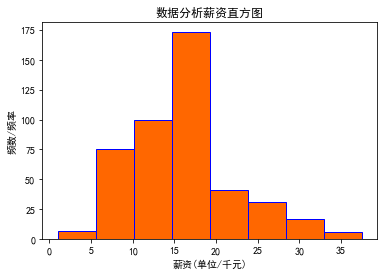

In [7]:
plt.hist(df['月薪'], bins=8, facecolor='#ff6700', edgecolor='blue')  # bins是默认的条形数目
plt.xlabel('薪资(单位/千元)')
plt.ylabel('频数/频率')
plt.title('数据分析薪资直方图')
plt.savefig('数据分析薪资分布.jpg')
plt.show()

### 绘制饼状图并保存

<class 'pandas.core.series.Series'>
Index(['北京', '上海', '深圳', '广州', '杭州', '成都', '苏州', '佛山', '厦门', '南京', '武汉', '重庆',
       '福州', '石家庄', '青岛', '合肥', '西安', '济南', '长沙', '郑州'],
      dtype='object')
列表长度 1
列表长度 2
列表长度 3
列表长度 4
列表长度 5
列表长度 6
列表长度 7
列表长度 8
列表长度 9
列表长度 10
列表长度 11
列表长度 12
列表长度 13
列表长度 14
列表长度 15
列表长度 16
列表长度 17
列表长度 18
列表长度 19
列表长度 20


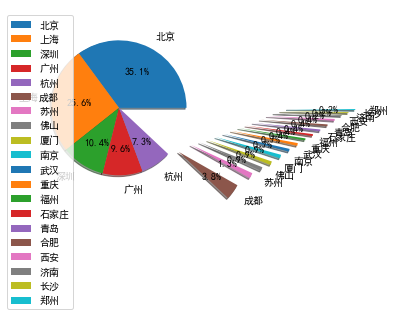

In [8]:
city = df['城市'].value_counts()
print(type(city))
# print(len(city))
label = city.keys()
print(label)
city_list = []
count = 0
n = 1
distance = []
for i in city:

    city_list.append(i)
    print('列表长度', len(city_list))
    count += 1
    if count > 5:
        n += 0.1
        distance.append(n)
    else:
        distance.append(0)
plt.pie(city_list, labels=label, labeldistance=1.2, autopct='%2.1f%%', pctdistance=0.6, shadow=True, explode=distance)
plt.axis('equal')  # 使饼图为正圆形
plt.legend(loc='upper left', bbox_to_anchor=(-0.1, 1))
plt.savefig('数据分析师地理位置分布图.jpg')
plt.show()

### 城市分布柱状图

Text(0.5, 1.0, '数据分析师职位的城市分布图')

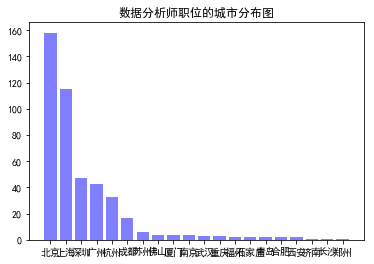

In [20]:
keys = city.index  # 等价于keys = city.keys()
values = city.values
import matplotlib.pyplot as plt
plt.bar(keys,values,color='b',alpha=0.5)
plt.title('数据分析师职位的城市分布图')

### 绘制福利待遇的词云

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


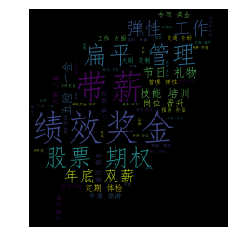

In [24]:
import jieba
from wordcloud import WordCloud
text = ''
for line in df['公司福利']:
    if len(eval(line)) == 0:
        continue
    else:
        for word in eval(line):
            # print(word)
            text += word

cut_word = ','.join(jieba.cut(text))
word_background = imread('leaf.jpg')
cloud = WordCloud(
    font_path=r'C:\Windows\Fonts\simfang.ttf',
    background_color='black',
    mask=word_background,
    max_words=500,
    max_font_size=100,
    width=400,
    height=800
)
word_cloud = cloud.generate(cut_word)
word_cloud.to_file('福利待遇词云.png')
plt.imshow(word_cloud)
plt.axis('off')
plt.show()